In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from plotnine import *
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
import seaborn as sns

Load the data:

In [3]:
train_df = pd.read_csv("train.csv")
train_df = train_df.set_index("PassengerId")
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv("test.csv")
test_df = test_df.set_index("PassengerId")
test_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Combine train and test data for preprocessing:

In [5]:
full_df = pd.concat([train_df, test_df])
full_df

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742


Check for N/As:

In [6]:
full_df.isna().sum(axis=0)

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [7]:
full_df[full_df["Embarked"].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [8]:
full_df[full_df["Fare"].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [9]:
full_df.groupby(["Sex", "Pclass"])["Fare"].agg({"Fare": "mean"})

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


Fare
Sex    Pclass            
female 1       109.412385
       2        23.234827
       3        15.324250
male   1        69.888385
       2        19.904946
       3        12.415462

Fill missing fare value:

In [10]:
full_df.loc[1044,"Fare"] = 12.42 #mean value for males in that Pclass

In [11]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Explore data visually:

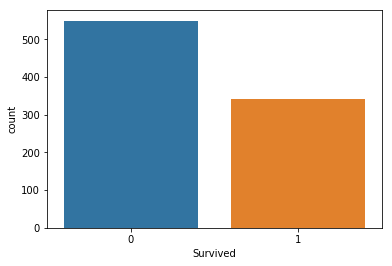

In [12]:
sns.countplot(x="Survived", data=train_df)

In [13]:
train_df.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

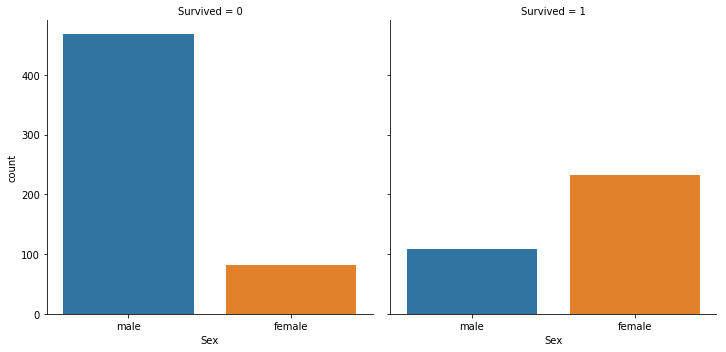

In [14]:
sns.catplot(x="Sex", col="Survived", kind="count", data = train_df)

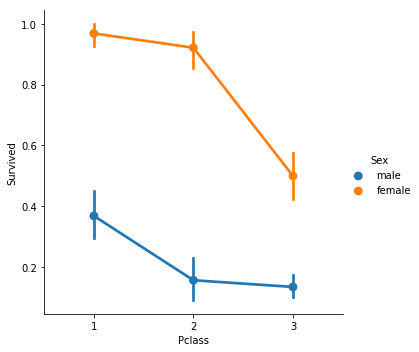

In [15]:
sns.catplot("Pclass", "Survived", hue="Sex", kind = "point", data=train_df)

In [16]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins = True).style.background_gradient(cmap="Pastel1")

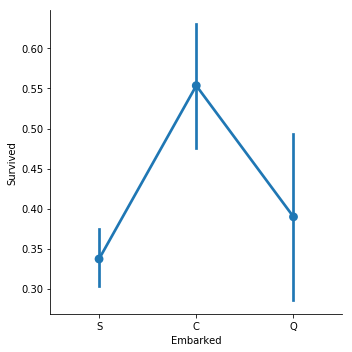

In [17]:
sns.catplot("Embarked", "Survived", kind="point", data = train_df)

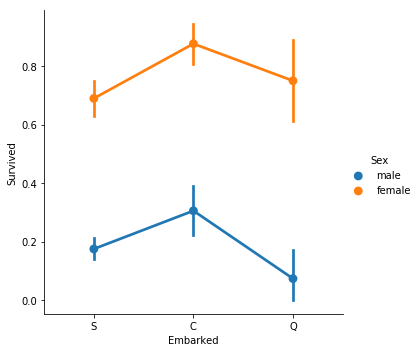

In [18]:
sns.catplot("Embarked", "Survived", hue ="Sex", kind="point", data=train_df)

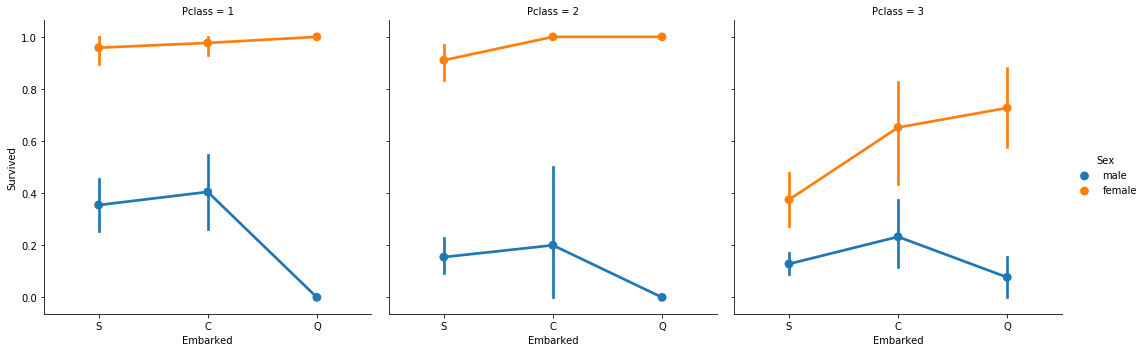

In [19]:
sns.catplot("Embarked", "Survived", col="Pclass", hue="Sex", kind="point", data=train_df)

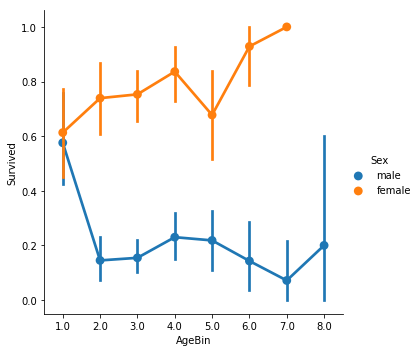

In [20]:
#bins = [0,10,20,30,40,50,60,70,80]
#labels = [1,2,3,4,5,6,7,8]

#age_bins = pd.cut(train_df["Age"],bins=bins, labels=labels)
#sns.catplot(age_bins,"Survived", hue = "Sex", kind="point", data=train_df)


for df in [train_df, test_df]:
    df["AgeBin"] = np.nan
    for i in range(8,0,-1):
        df.loc[df["Age"]<=i*10,"AgeBin"] = i
        
sns.catplot("AgeBin", "Survived", hue="Sex", kind="point", data=train_df)

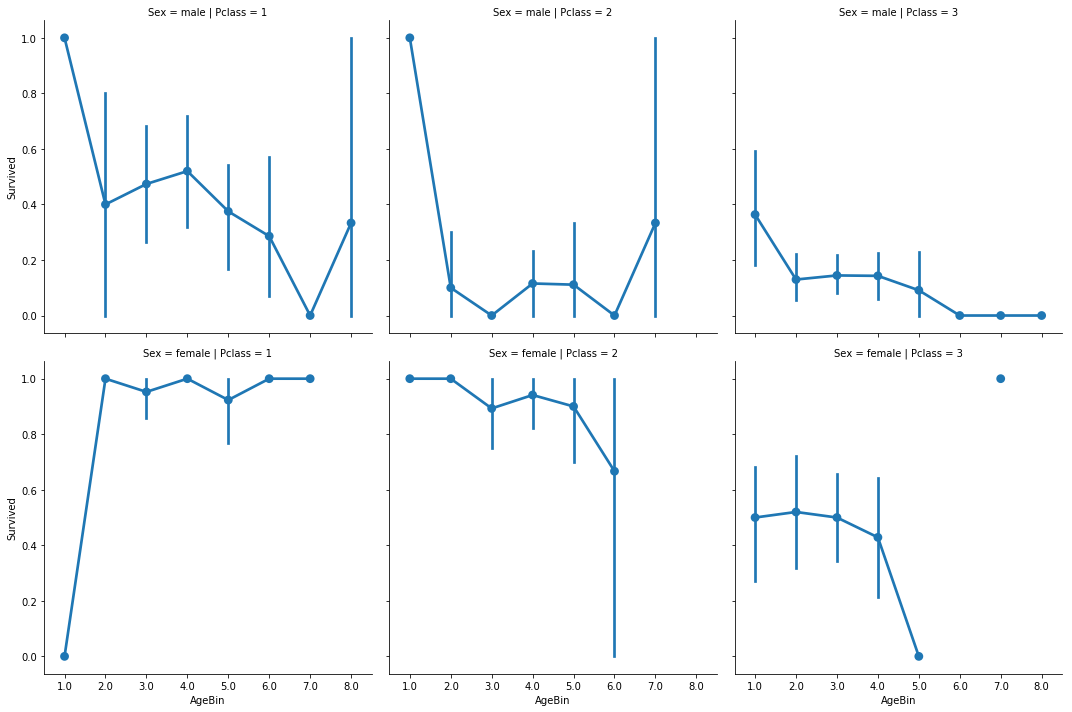

In [21]:
sns.catplot("AgeBin", "Survived", col="Pclass", row="Sex", kind="point", data=train_df)

In [22]:
cat_cols = ["Pclass", "Survived", "Embarked", "Sex"]
train_df[cat_cols] = train_df[cat_cols].astype("category")

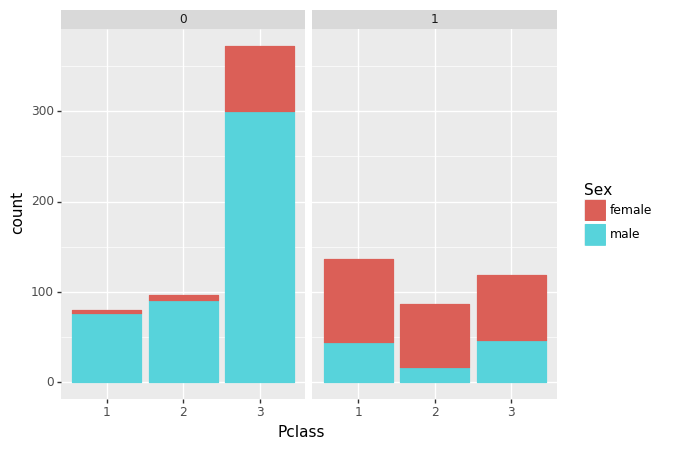

<ggplot: (-9223363244625609668)>

In [23]:
(ggplot(train_df)
+aes("Pclass", color="Sex", fill="Sex")
+geom_bar()
+facet_wrap("~Survived"))

In [24]:
train_df["RelAb"] = train_df["SibSp"] + train_df["Parch"]
train_df["RelAb"] = train_df["RelAb"].astype("int64")

In [25]:
qual_cols = ["AgeAvail","Embarked","Sex","Pclass"]
quant_cols = ["Age","RelAb", "Fare"]
f = pd.melt(train_df, id_vars=["Survived"], value_vars=quant_cols)
f.head(20)

,Survived,variable,value
0,0,Age,22.0
1,1,Age,38.0
2,1,Age,26.0
3,1,Age,35.0
4,0,Age,35.0
5,0,Age,NaN
6,0,Age,54.0
7,0,Age,2.0
8,1,Age,27.0
9,1,Age,14.0


/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


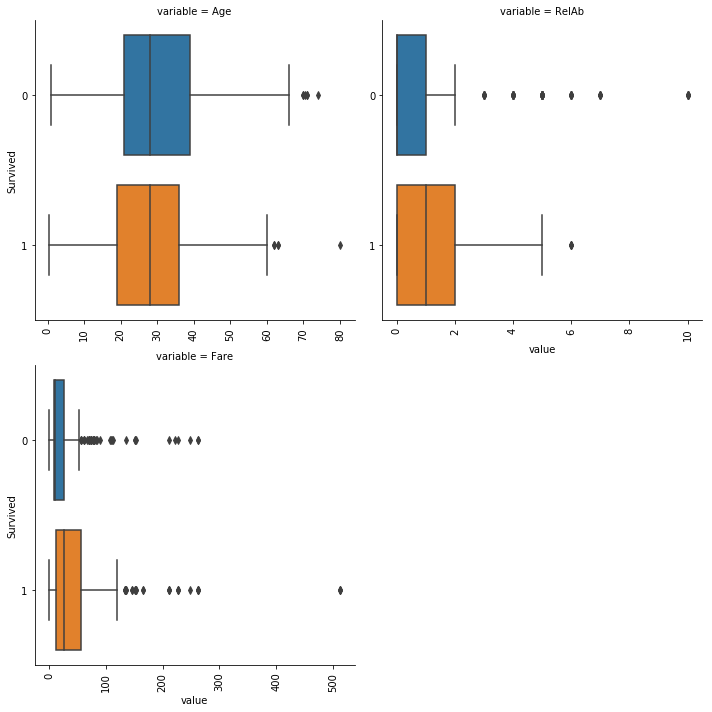

In [26]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "Survived")

In [27]:
train_df[train_df["Age"]>75]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,RelAb
PassengerId,,,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,8.0,0


In [28]:
full_df[full_df["Fare"] > 500]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,PC 17755
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,PC 17755
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,PC 17755
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,PC 17755


In [29]:
full_df.loc[full_df["Fare"] > 500, "Fare"] = full_df.loc[full_df["Fare"] > 500, "Fare"] / 4.0
full_df.loc[259]

Age                       35
Cabin                    NaN
Embarked                   C
Fare                 128.082
Name        Ward, Miss. Anna
Parch                      0
Pclass                     1
Sex                   female
SibSp                      0
Survived                   1
Ticket              PC 17755
Name: 259, dtype: object

In [30]:
full_df[full_df["Fare"] > 100].groupby("Ticket").count()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
Ticket,,,,,,,,,,
113503,5,5,5,5,5,5,5,5,5,1
113760,4,4,4,4,4,4,4,4,4,4
113781,6,4,6,6,6,6,6,6,6,4
13508,2,2,2,2,2,2,2,2,2,0
16966,5,5,5,5,5,5,5,5,5,2
17421,3,3,4,4,4,4,4,4,4,4
19950,6,6,6,6,6,6,6,6,6,4
24160,4,3,4,4,4,4,4,4,4,3
35273,3,3,3,3,3,3,3,3,3,3


/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


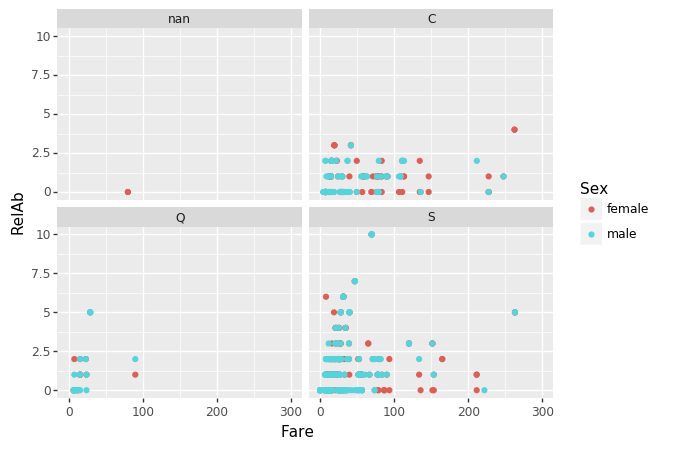

<ggplot: (-9223363244627538607)>

In [31]:
(ggplot(train_df)
+aes("Fare", "RelAb", color = "Sex")
+geom_point()
+xlim(0,300)
+facet_wrap("Embarked"))

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_bar : Removed 14 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


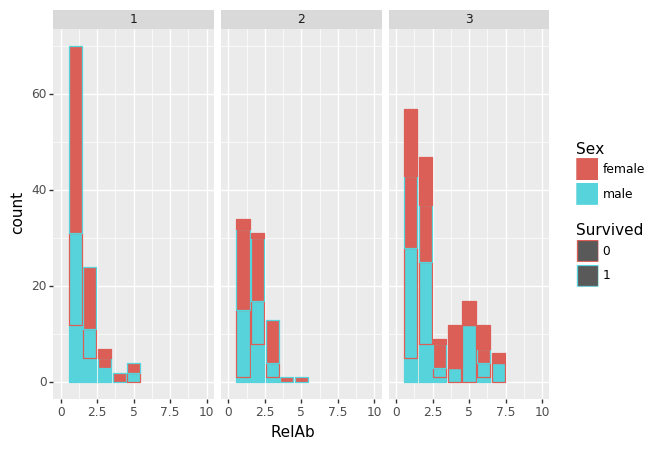

<ggplot: (-9223363244627637090)>

In [32]:
(ggplot(train_df)
+aes("RelAb", color = "Survived", fill="Sex")
+geom_bar()
+xlim(0,10)
+ylim(0,70)
+facet_wrap("Pclass"))

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


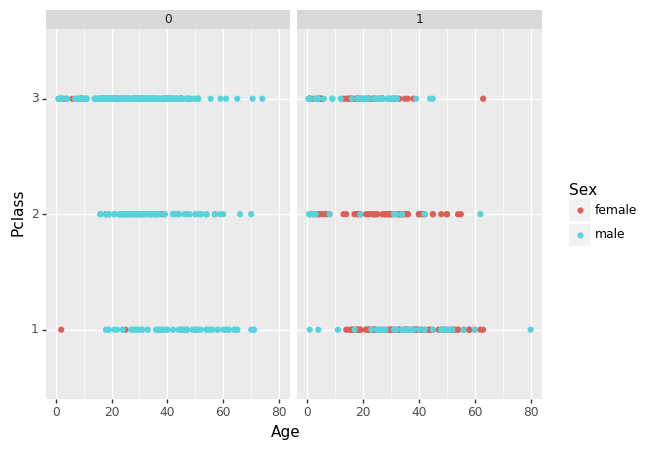

<ggplot: (-9223363244627714381)>

In [33]:
(ggplot(train_df)
+aes("Age","Pclass", color="Sex")
+geom_point()
+facet_wrap("Survived"))

In [34]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [35]:
train_df.loc[(train_df["Pclass"] == 1) & (train_df["Survived"] == 0) & (train_df["Sex"] == "female")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,RelAb
PassengerId,,,,,,,,,,,,,
178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,5.0,0
298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,1.0,3
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3.0,3


Save preprocessed dataframe to csv:

In [36]:
full_df.to_csv("full_df.csv")